# Stress Detection From Wearables

## Import

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from stress_detector.data.datatype import DataType
from stress_detector.preprocessing import load_data
from stress_detector.model import train, evaluate
from stress_detector import constants
from synthesizers.preprocessing.wesad import WESADDataset


## Train model

![model_architecture](images/model_architecture.png)

### Train LOSO

Train without Subject 14 for 1 to 100 synthetic subjects

In [ ]:
LOSO_FLAG = True
NUM_EPOCHS = 100

SYNTHETIC_SUBJECT_PATH_DGAN_WO_14 = 'data/syn/dgan/no_dp/syn_dataset_36_sub14.npy'

all_subjects_X, all_subjects_y = load_data(DataType.DGAN, 1, synthetic_data_path=SYNTHETIC_SUBJECT_PATH_DGAN_WO_14)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.DGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

In [ ]:
LOSO_FLAG = True
NUM_EPOCHS = 100

num_syns = [i for i in range(2,11,1)]
for num_syn_subjects in num_syns:
    
    synthetic_subject_path_cgan_lstm = f"data/syn/cgan/no_dp/lstm/loso/sub14/lunar-moon-2/sub_num_{num_syn_subjects}/syn_subject_72.npy"
    print(synthetic_subject_path_cgan_lstm)
    all_subjects_X, all_subjects_y = load_data(DataType.CGAN, 1, synthetic_data_path=synthetic_subject_path_cgan_lstm, use_sliding_windows=True)
    print(len(all_subjects_X))
    train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.CGAN_LSTM, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG, test_sub=14, num_syn_samples=num_syn_subjects)


In [ ]:
LOSO_FLAG = True
NUM_EPOCHS = 100

num_syns = [i for i in range(2,11,1)]
for num_syn_subjects in num_syns:
    
    synthetic_subject_path_cgan_fcn = f"data/syn/cgan/no_dp/lstm/loso/sub14/toasty-sweep-2/sub_num_{num_syn_subjects}/syn_subject_72.npy"
    print(synthetic_subject_path_cgan_fcn)
    all_subjects_X, all_subjects_y = load_data(DataType.CGAN, 1, synthetic_data_path=synthetic_subject_path_cgan_fcn, use_sliding_windows=True)
    print(len(all_subjects_X))
    train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.CGAN_FCN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG, test_sub=14, num_syn_samples=num_syn_subjects)

In [ ]:
LOSO_FLAG = True
NUM_EPOCHS = 100

num_syns = [1] + [i for i in range(10,101,10)]
for num_syn_subjects in num_syns:
    synthetic_subject_path_dgan_wo_sub14 = f"data/syn/dgan/no_dp/loso/sub14/sub_num_{num_syn_subjects}/syn_subject_72.npy"
    print(synthetic_subject_path_dgan_wo_sub14)
    all_subjects_X, all_subjects_y = load_data(DataType.DGAN, 1, synthetic_data_path=synthetic_subject_path_dgan_wo_sub14, use_sliding_windows=True)
    print(len(all_subjects_X))
    train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.DGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG, test_sub=14, num_syn_samples=num_syn_subjects)
    

Train LOSO

In [ ]:
NUM_EPOCHS = 100
LOSO_FLAG = True

SYNTHETIC_SUBJECT_PATH_DGAN = 'data/syn/dgan/syn_subject.npy'
SYNTHETIC_SUBJECT_PATH_CGAN_FCN = 'data/syn/cgan_fcn/silvery-sweep-2_0.64/syn_subject.npy'
SYNTHETIC_SUBJECT_PATH_CGAN_LSTM = 'data/syn/cgan_lstm/resilient-sweep-1_0.74/syn_subject.npy'
SYNTHETIC_SUBJECT_PATH_TIMEGAN = 'data/syn/dgan/syn_subject.npy'

all_subjects_X, all_subjects_y = load_data(DataType.REAL, 1, synthetic_data_path=None, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.REAL, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

all_subjects_X, all_subjects_y = load_data(DataType.TIMEGAN, 1, synthetic_data_path=SYNTHETIC_SUBJECT_PATH_TIMEGAN)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.TIMEGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

all_subjects_X, all_subjects_y = load_data(DataType.DGAN, 1, synthetic_data_path=SYNTHETIC_SUBJECT_PATH_DGAN)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.DGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

all_subjects_X, all_subjects_y = load_data(DataType.CGAN, 1, synthetic_data_path=SYNTHETIC_SUBJECT_PATH_CGAN_FCN, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.CGAN_FCN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

all_subjects_X, all_subjects_y = load_data(DataType.CGAN, 1, synthetic_data_path=SYNTHETIC_SUBJECT_PATH_CGAN_LSTM, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.CGAN_LSTM, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

### Train TSTR

In [ ]:
LOSO_FLAG = False
NUM_EPOCHS = 100

SYNTHETIC_DATASET_PATH_DGAN = 'data/syn/dgan/syn_dataset.npy'
SYNTHETIC_DATASET_PATH_CGAN_FCN = 'data/syn/cgan_fcn/silvery-sweep-2_0.64/syn_dataset.npy'
SYNTHETIC_DATASET_PATH_CGAN_LSTM = 'data/syn/cgan_lstm/resilient-sweep-1_0.74/syn_dataset.npy'
SYNTHETIC_DATASET_PATH_TIMEGAN = 'data/syn/dgan/syn_dataset.npy'

# all_subjects_X, all_subjects_y = load_data(DataType.REAL, 1, synthetic_data_path=SYNTHETIC_DATASET_PATH_DGAN, use_sliding_windows=True)
# train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.REAL, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

all_subjects_X, all_subjects_y = load_data(DataType.DGAN, 1, synthetic_data_path=SYNTHETIC_DATASET_PATH_DGAN, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.DGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

all_subjects_X, all_subjects_y = load_data(DataType.CGAN, 1, synthetic_data_path=SYNTHETIC_DATASET_PATH_CGAN_FCN, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.CGAN_FCN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

all_subjects_X, all_subjects_y = load_data(DataType.CGAN, 1, synthetic_data_path=SYNTHETIC_DATASET_PATH_CGAN_LSTM, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.CGAN_LSTM, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

all_subjects_X, all_subjects_y = load_data(DataType.TIMEGAN, 1, synthetic_data_path=SYNTHETIC_DATASET_PATH_TIMEGAN, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.TIMEGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)

## Evaluation

In [5]:
all_subjects_X, all_subjects_y = load_data(DataType.REAL, 1, synthetic_data_path=None, use_sliding_windows=True)

*** Try to load original data from disk ***

original data loaded


In [ ]:
def evaluate_gan_scores(all_subjects_X, all_subjects_y, num_epochs, with_loso, subject_ids):
    gan_scores = {
        'accuracy': {},
        'f1_score': {},
        'precision': {},
        'recall': {}
    }

    gan_types = [
        DataType.CGAN_LSTM,
        DataType.CGAN_FCN,
        # DataType.DPCGAN,
        DataType.TIMEGAN,
        DataType.DGAN,
        DataType.REAL
    ]

    for gan_type in gan_types:
        if gan_type == DataType.REAL:
            with_loso = True  # Set LOSO_FLAG to True for REAL data type
        else:
            with_loso = with_loso

        print(f"WITH LOSO: {with_loso}")
        evaluate(
            gan_scores['accuracy'],
            gan_scores['f1_score'],
            gan_scores['precision'],
            gan_scores['recall'],
            all_subjects_X,
            all_subjects_y,
            gan_type,
            num_epochs=num_epochs,
            with_loso=with_loso,
            subject_ids=subject_ids
        )

    groups_set = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    replacements = {l1: f'S{l2}' for l1, l2 in zip(groups_set, constants.SUBJECT_IDS)}

    df_gan_scores = {}

    for metric in gan_scores:
        df_gan_scores[metric] = pd.DataFrame(gan_scores[metric])
        df_gan_scores[metric] = df_gan_scores[metric].rename(replacements)
        df_gan_scores[metric].to_csv(f'evaluation/gan_scores_{metric}_loso.csv')
        # df_gan_scores[metric].plot.bar(figsize=(20, 10), title=f'{metric.capitalize()} of different OS models on each subject')

    mean_scores = {}

    for metric in df_gan_scores:
        mean_scores[metric] = df_gan_scores[metric].mean()

    df_mean_scores = pd.DataFrame(mean_scores)

    return df_gan_scores, df_mean_scores

LOSO_FLAG = True
NUM_EPOCHS = 100
df_mean_scores_loso = evaluate_gan_scores(all_subjects_X, all_subjects_y, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG, subject_ids=constants.SUBJECT_IDS)
print(df_mean_scores_loso)

LOSO_FLAG = False
df_mean_scores_tstr = evaluate_gan_scores(all_subjects_X, all_subjects_y, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG, subject_ids=constants.SUBJECT_IDS)
print(df_mean_scores_tstr[1])


### Evaluate: Find optimal Augmentation size

In [182]:
import tensorflow as tf

def evaluate(
    all_subjects_X,
    all_subjects_y,
    data_type: DataType,
    num_epochs: int,
    num_subjects: int = 1,
    with_loso: bool = True,
    subject_ids=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17],
    additional_name: str = None,
):
    model_path = ""

    all_subjects_X_os = all_subjects_X
    all_accuracies = []
    all_precisions = []
    all_recalls = []
    all_f1s = []
    num_output_class = 2

    if not with_loso:
        print("*** Train on Synth, test on Real ***")
    else:
        print("*** Evaluate using 'Leave One Subject Out'-Method ***")

    if not with_loso:
        print(f"DATATYPE: {data_type}")
        if data_type == DataType.DGAN:
            model_path = (
                f"models/stress_detector/tstr/syn/dgan_30000/{num_epochs}/wesad.h5"
            )
        if data_type == DataType.CGAN_LSTM:
            model_path = (
                f"models/stress_detector/tstr/syn/cgan/no_dp/lstm/{num_epochs}/wesad.h5"
            )
        if data_type == DataType.CGAN_FCN:
            model_path = (
                f"models/stress_detector/tstr/syn/cgan/no_dp/fcn/{num_epochs}/wesad.h5"
            )
        if data_type == DataType.CGAN_TRANSFORMER:
            model_path = f"models/stress_detector/tstr/syn/cgan/no_dp/transformer/{num_epochs}/wesad.h5"
        if data_type == DataType.DPCGAN:
            model_path = f"models/stress_detector/tstr/syn/cgan/dp/{num_epochs}/{additional_name}_wesad.h5"
        if data_type == DataType.TIMEGAN:
            model_path = (
                f"models/stress_detector/tstr/syn/timegan/{num_epochs}/wesad.h5"
            )
        model = tf.keras.models.load_model(model_path)
        print(f"LOADED: {model_path}")

    all_confusion_matrices = []
    for i, subject_id in enumerate(subject_ids):
        test_index = constants.SUBJECT_IDS.index(subject_id)
        X_test = np.asarray(all_subjects_X_os[test_index])
        y_test = np.asarray(all_subjects_y[test_index])
        y_test = tf.keras.utils.to_categorical(y_test, num_output_class)

        if with_loso:
            if data_type == DataType.REAL:
                model_path = f"models/stress_detector/real/{num_epochs}/wesad_s{subject_id}.h5"  # Path to save the model file
            if data_type == DataType.DGAN:
                model_path = f"models/stress_detector/loso/syn/dgan_30000/{num_epochs}_epochs/{num_subjects}_subjects/wesad_s{subject_id}.h5"
            if data_type == DataType.CGAN_LSTM:
                model_path = f"models/stress_detector/loso/syn/cgan/no_dp/lstm/{num_epochs}_epochs/{num_subjects}_subjects/wesad_s{subject_id}.h5"
            if data_type == DataType.CGAN_FCN:
                model_path = f"models/stress_detector/loso/syn/cgan/no_dp/fcn/{num_epochs}_epochs/{num_subjects}_subjects/wesad_s{subject_id}.h5"
            if data_type == DataType.CGAN_TRANSFORMER:
                model_path = f"models/stress_detector/loso/syn/cgan/no_dp/transformer/{num_epochs}_epochs/{num_subjects}_subjects/wesad_s{subject_id}.h5"
            if data_type == DataType.DPCGAN:
                model_path = f"models/stress_detector/loso/syn/cgan/dp/{num_epochs}_epochs/{num_subjects}_subjects/wesad_s{subject_id}.h5"
            if data_type == DataType.TIMEGAN:
                model_path = f"models/stress_detector/loso/syn/timegan/{num_epochs}_epochs/{num_subjects}_subjects/wesad_s{subject_id}.h5"

            print("MODEL_PATH:", model_path)
            model = tf.keras.models.load_model(model_path)

        evaluation_metrics = model.evaluate(X_test, y_test, verbose=0)

        accuracy = evaluation_metrics[1]
        precision = evaluation_metrics[2]
        recall = evaluation_metrics[3]

        f1 = 2 * precision * recall / (precision + recall)
        all_accuracies.append(accuracy)
        all_precisions.append(precision)
        all_recalls.append(recall)
        all_f1s.append(f1)

    print(f"GAN: {data_type.name}")
    print(f"Evaluation of CNN model trained on {num_epochs} epochs\n")
    print(f"Subject\t\t Accuracy\tPrecision\tRecall\t\tF1-Score")
    print("************************************************************************")
    for i in range(len(all_accuracies)):
        print(
            f"S{subject_ids[i]}\t\t {round(all_accuracies[i], 5):.5f}\t{round(all_precisions[i], 5):.5f}\t\t{round(all_recalls[i], 5):.5f}\t\t{round(all_f1s[i], 5):.5f}"
        )

    print("************************************************************************")
    print(
        f"Average\t\t {round(np.mean(all_accuracies), 5):.5f}\t{round(np.mean(all_precisions), 5):.5f}\t\t{round(np.mean(all_recalls), 5):.5f}\t\t{round(np.mean(all_f1s), 5):.5f}\n\n\n"
    )

    return {
        "acc": all_accuracies,
        "f1": all_precisions,
        "precision": all_recalls,
        "recall": all_f1s,
    }


In [217]:
num_syns = [1] + [i for i in range(10,101,10)]

results = {}

gan_types = [
    DataType.CGAN_LSTM,
    DataType.CGAN_FCN,
    # DataType.DPCGAN,
    #DataType.TIMEGAN,
    DataType.DGAN,
    #DataType.REAL
]
for num_syn in num_syns:
    results[f'{num_syn}'] = {}
    print(num_syn)
    for gan_type in gan_types:

        result = evaluate(
            all_subjects_X,
            all_subjects_y,
            gan_type,
            num_epochs=100,
            with_loso=True,
            subject_ids=[14],
            num_subjects=num_syn
        )

        results[f'{num_syn}'][f'{gan_type}'] = result

1
*** Evaluate using 'Leave One Subject Out'-Method ***
MODEL_PATH: models/stress_detector/loso/syn/cgan/no_dp/lstm/100_epochs/1_subjects/wesad_s14.h5
GAN: CGAN_LSTM
Evaluation of CNN model trained on 100 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S14		 0.55556	0.54795		0.55556		0.55172
************************************************************************
Average		 0.55556	0.54795		0.55556		0.55172



*** Evaluate using 'Leave One Subject Out'-Method ***
MODEL_PATH: models/stress_detector/loso/syn/cgan/no_dp/fcn/100_epochs/1_subjects/wesad_s14.h5
GAN: CGAN_FCN
Evaluation of CNN model trained on 100 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S14		 0.48611	0.47059		0.44444		0.45714
************************************************************************
Average		 0.48611	0.47059		0.44444		0.45714



*** Evaluate using '

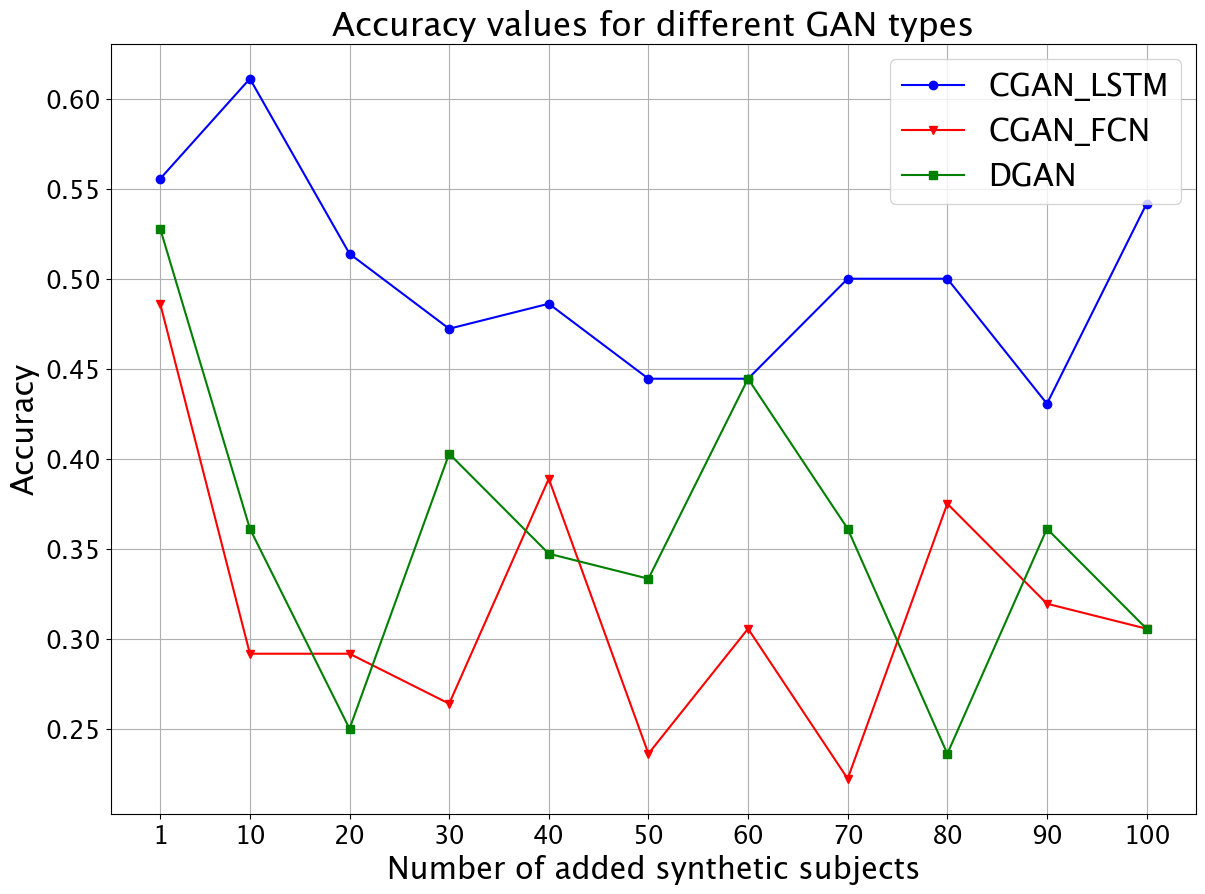

In [267]:
# Extract the data from the nested dictionary
x_values = [int(x) for x in results.keys()]
y_values_lstm = [results[x]['DataType.CGAN_LSTM']['acc'][0] for x in results.keys()]
y_values_fcn = [results[x]['DataType.CGAN_FCN']['acc'][0] for x in results.keys()]
y_values_dgan = [results[x]['DataType.DGAN']['acc'][0] for x in results.keys()]

# Create a new plot
fig, ax = plt.subplots(figsize=(14, 10)) # Increase figure size

# Plot the data with different line styles, colors and markers
ax.plot(x_values, y_values_lstm, label='CGAN_LSTM', linestyle='-', color='b', marker='o')
ax.plot(x_values, y_values_fcn, label='CGAN_FCN', linestyle='-', color='r', marker='v')
ax.plot(x_values, y_values_dgan, label='DGAN', linestyle='-', color='g', marker='s')

# Add labels and title with increased font size
ax.set_xlabel('Number of added synthetic subjects', fontsize=22)
ax.set_ylabel('Accuracy', fontsize=22)
ax.set_title('Accuracy values for different GAN types', fontsize=24)

# Set x-axis labels starting at 1 and ending at 100 with a step of 10
ax.set_xticks(num_syns)

# Add a grid
ax.grid(True)

# Increase the font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Add a legend with increased font size
ax.legend(fontsize=22, loc = "upper right")

plt.savefig(f"plots/gan_added_num_syns_acc.pdf", format="pdf", bbox_inches="tight")
# Display the plot
plt.show()


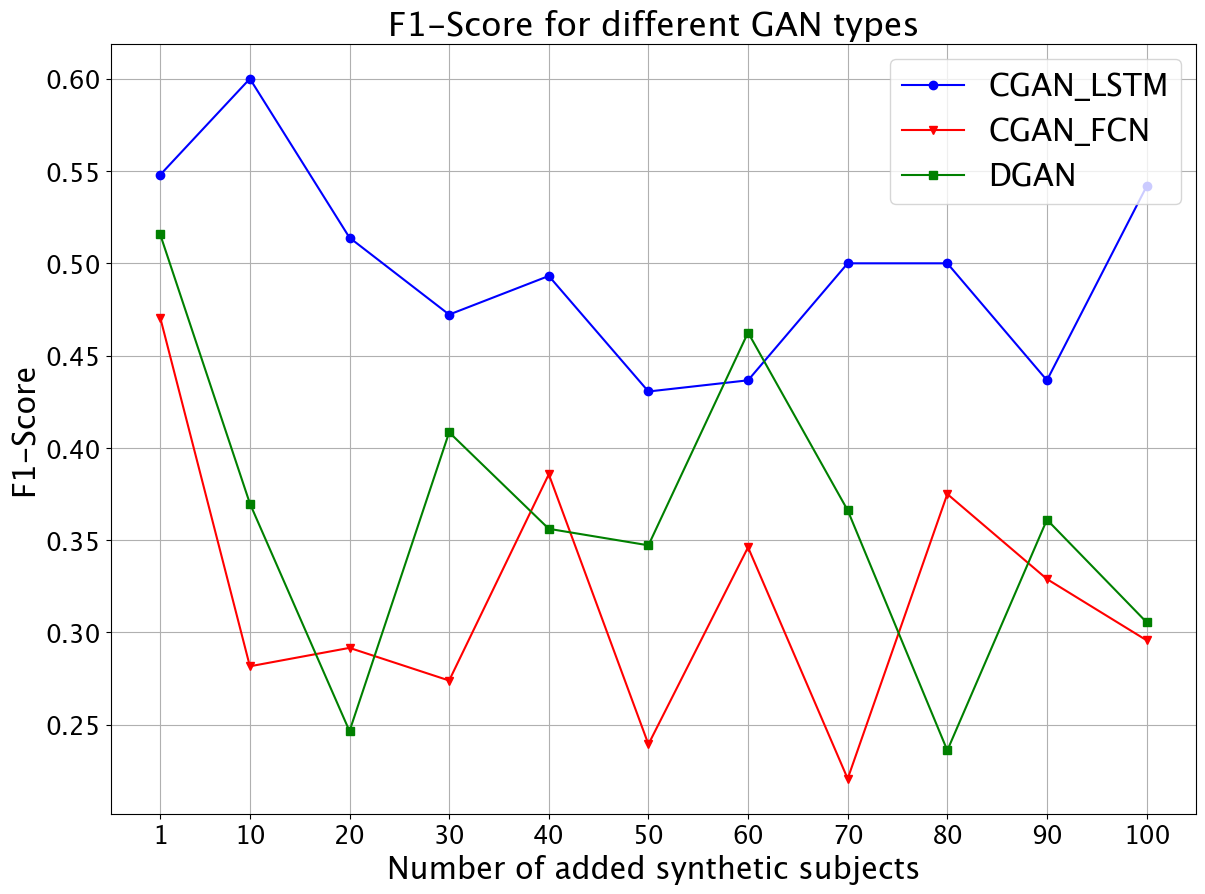

In [268]:
import matplotlib.pyplot as plt

# Extract the data from the nested dictionary
x_values = [int(x) for x in results.keys()]
y_values_lstm = [results[x]['DataType.CGAN_LSTM']['f1'][0] for x in results.keys()]
y_values_fcn = [results[x]['DataType.CGAN_FCN']['f1'][0] for x in results.keys()]
y_values_dgan = [results[x]['DataType.DGAN']['f1'][0] for x in results.keys()]

# Create a new plot
fig, ax = plt.subplots(figsize=(14, 10)) # Increase figure size

# Plot the data with different line styles, colors and markers
ax.plot(x_values, y_values_lstm, label='CGAN_LSTM', linestyle='-', color='b', marker='o')
ax.plot(x_values, y_values_fcn, label='CGAN_FCN', linestyle='-', color='r', marker='v')
ax.plot(x_values, y_values_dgan, label='DGAN', linestyle='-', color='g', marker='s')

# Add labels and title with increased font size
ax.set_xlabel('Number of added synthetic subjects', fontsize=22)
ax.set_ylabel('F1-Score', fontsize=22)
ax.set_title('F1-Score for different GAN types', fontsize=24)

# Set x-axis labels starting at 1 and ending at 100 with a step of 10
ax.set_xticks(num_syns)

# Add a grid
ax.grid(True)

# Increase the font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=18)


# Add a legend with increased font size
ax.legend(fontsize=22, loc='upper right')

plt.savefig(f"plots/gan_added_num_syns_f1.pdf", format="pdf", bbox_inches="tight")
# Display the plot
plt.show()


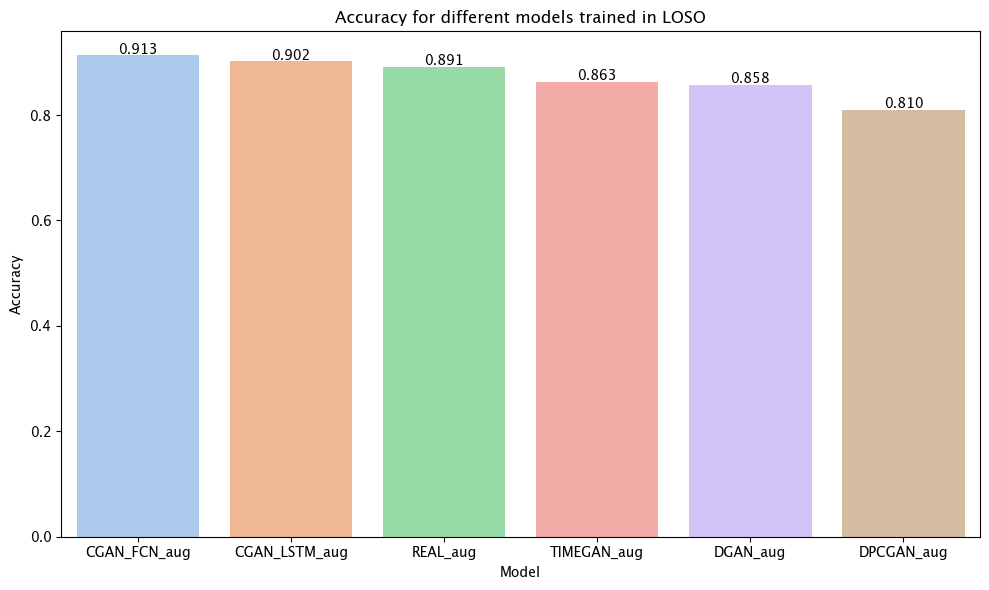

In [67]:
# Your provided data as a pandas dataframe
data = df_mean_scores_loso['accuracy']
index = ['CGAN_LSTM', 'CGAN_FCN', 'DPCGAN', 'TIMEGAN', 'DGAN', 'REAL']
df = pd.DataFrame(data)

# Sort by accuracy
df = df.sort_values('accuracy', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df.index, y=df['accuracy'], palette='pastel')
plt.title('Accuracy for different models trained in LOSO')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)  # Rotating the x-axis labels for better visibility


# Loop over the bars, and add a label for each
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()


### Evaluate DP

In [12]:
NUM_EPOCHS = 100
LOSO_FLAG = False

dp_cgan_windows_0_1_path = "data/syn/cgan/dp/lstm/major-sweep-1/generator_1602e_0.926605504587156c2st/syn_dataset_540.npy"
dp_cgan_windows_1_path = "data/syn/cgan/dp/lstm/dandy-sweep-2/generator_2923e_0.8807339449541285c2st/syn_dataset_540.npy"
dp_cgan_windows_10_path = "data/syn/cgan/dp/lstm/efficient-sweep-3/generator_1254e_0.9174311926605505c2st/syn_dataset_540.npy"
dp_cgan_windows_infty_path = "data/syn/cgan/no_dp/lstm/resilient-sweep-1_0.74/syn_dataset_540.npy"

In [332]:
dp_cgan_windows_0_1_path = "data/syn/cgan/dp/lstm/light-sweep-1/cgan_generator/syn_dataset_1080.npy"
dp_cgan_windows_1_path = "data/syn/cgan/dp/lstm/revived-sweep-2/cgan_generator/syn_dataset_1080.npy"
dp_cgan_windows_10_path = "data/syn/cgan/dp/lstm/usual-sweep-3/cgan_generator/syn_dataset_1080.npy"
dp_cgan_windows_infty_path = "data/syn/cgan/no_dp/serene-cloud-22/syn_dataset_540.npy"

In [ ]:
all_subjects_X, all_subjects_y = load_data(data_type=DataType.DPCGAN, sampling_rate=1, synthetic_data_path=dp_cgan_windows_0_1_path, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.DPCGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG, additional_name="DP-cGAN_0_1")

all_subjects_X, all_subjects_y = load_data(data_type=DataType.DPCGAN, sampling_rate=1, synthetic_data_path=dp_cgan_windows_1_path, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.DPCGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG, additional_name="DP-cGAN_1")

all_subjects_X, all_subjects_y = load_data(data_type=DataType.DPCGAN, sampling_rate=1, synthetic_data_path=dp_cgan_windows_10_path, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.DPCGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG, additional_name="DP-cGAN_10")

all_subjects_X, all_subjects_y = load_data(data_type=DataType.DPCGAN, sampling_rate=1, synthetic_data_path=dp_cgan_windows_infty_path, use_sliding_windows=True)
train(constants.SIGNALS, all_subjects_X, all_subjects_y, data_type=DataType.DPCGAN, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG, additional_name="DP-cGAN_Infty")

In [334]:
def evaluate_gan_scores(all_subjects_X, all_subjects_y, num_epochs, with_loso):
    gan_scores = {
        'accuracy': {},
        'f1_score': {},
        'precision': {},
        'recall': {}
    }

    gan_types = [
        DataType.DPCGAN,
        DataType.REAL
    ]

    dp_models = ["DP-cGAN_0_1", "DP-cGAN_1", "DP-cGAN_10", "DP-cGAN_Infty"]

    for gan_type in gan_types:
        if gan_type == DataType.DPCGAN:
            for model_id in dp_models:
                id = model_id
                evaluate(
                    gan_scores['accuracy'],
                    gan_scores['f1_score'],
                    gan_scores['precision'],
                    gan_scores['recall'],
                    all_subjects_X,
                    all_subjects_y,
                    gan_type,
                    num_epochs=num_epochs,
                    with_loso=False,
                    additional_name=id
                )
        else:
            evaluate(
                gan_scores['accuracy'],
                gan_scores['f1_score'],
                gan_scores['precision'],
                gan_scores['recall'],
                all_subjects_X,
                all_subjects_y,
                gan_type,
                num_epochs=num_epochs,
                with_loso=True,
                additional_name="REAL"
            )

    groups_set = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    replacements = {l1: f'S{l2}' for l1, l2 in zip(groups_set, constants.SUBJECT_IDS)}

    df_gan_scores = {}

    for metric in gan_scores:
        df_gan_scores[metric] = pd.DataFrame(gan_scores[metric])
        df_gan_scores[metric] = df_gan_scores[metric].rename(replacements)
        df_gan_scores[metric].to_csv(f'evaluation/dp_gan_scores_{metric}.csv')
        # df_gan_scores[metric].plot.bar(figsize=(20, 10), title=f'{metric.capitalize()} of different OS models on each subject')

    mean_scores = {}

    for metric in df_gan_scores:
        mean_scores[metric] = df_gan_scores[metric].mean()

    df_mean_scores = pd.DataFrame(mean_scores)

    return df_gan_scores, df_mean_scores

all_subjects_X_new, all_subjects_y_new = load_data(data_type=DataType.REAL, sampling_rate=1, synthetic_data_path="", use_sliding_windows=True)

LOSO_FLAG = False

df_mean_scores_tstr = evaluate_gan_scores(all_subjects_X, all_subjects_y, num_epochs=NUM_EPOCHS, with_loso=LOSO_FLAG)
print("LOSO_FLAG = False")
print(df_mean_scores_tstr)


*** Try to load original data from disk ***

original data loaded
*** Train on Synth, test on Real ***
DATATYPE: DataType.DPCGAN
LOADED: models/stress_detector/tstr/syn/cgan/dp/100/DP-cGAN_0_1_wesad.h5
3/3 [==============================] - 0s 6ms/step
GAN: DPCGAN
Evaluation of CNN model trained on 100 epochs

Subject		 Accuracy	Precision	Recall		F1-Score
************************************************************************
S2		 0.80882	0.81159		0.82353		0.81752
S3		 0.75362	0.75362		0.75362		0.75362
S4		 0.92857	0.92857		0.92857		0.92857
S5		 0.91549	0.91549		0.91549		0.91549
S6		 0.71831	0.71831		0.71831		0.71831
S7		 0.98592	0.98592		0.98592		0.98592
S8		 0.88732	0.88732		0.88732		0.88732
S9		 0.70423	0.70423		0.70423		0.70423
S10		 0.84932	0.84932		0.84932		0.84932
S11		 0.81944	0.81944		0.81944		0.81944
S13		 0.90278	0.90278		0.90278		0.90278
S14		 0.63889	0.63889		0.63889		0.63889
S15		 0.70833	0.70833		0.70833		0.70833
S16		 0.69444	0.69444		0.69444		0.69444
S17		 0.84932	0.8

In [335]:
df_mean_scores_tstr[1]

,accuracy,f1_score,precision,recall
DPCGAN_tstrDP-cGAN_0_1,0.810987,0.812088,0.811307,0.812881
DPCGAN_tstrDP-cGAN_1,0.707915,0.707915,0.707915,0.707915
DPCGAN_tstrDP-cGAN_10,0.777767,0.780000,0.774975,0.785214
DPCGAN_tstrDP-cGAN_Infty,0.901046,0.900483,0.900860,0.900120
REAL_augREAL,0.892976,0.889991,0.891711,0.888319
